## Лабораторная работа №5

Задание: Выделить ягоды

In [80]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb


image = cv.imread('img.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

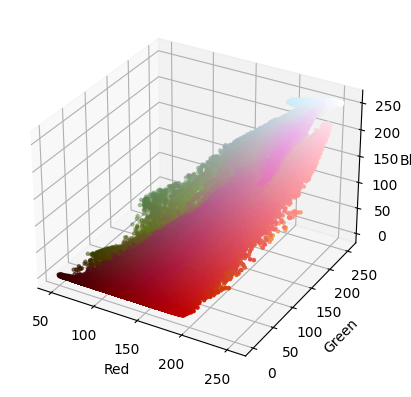

In [72]:
r, g, b = cv.split(image_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [73]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

D:\System\Temp\ipykernel_1376\2910990521.py:11: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axis.dist = 11


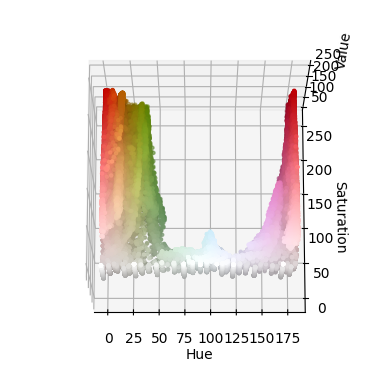

In [74]:
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")

axis.azim = -90
axis.dist = 11
axis.elev = 75

plt.show()

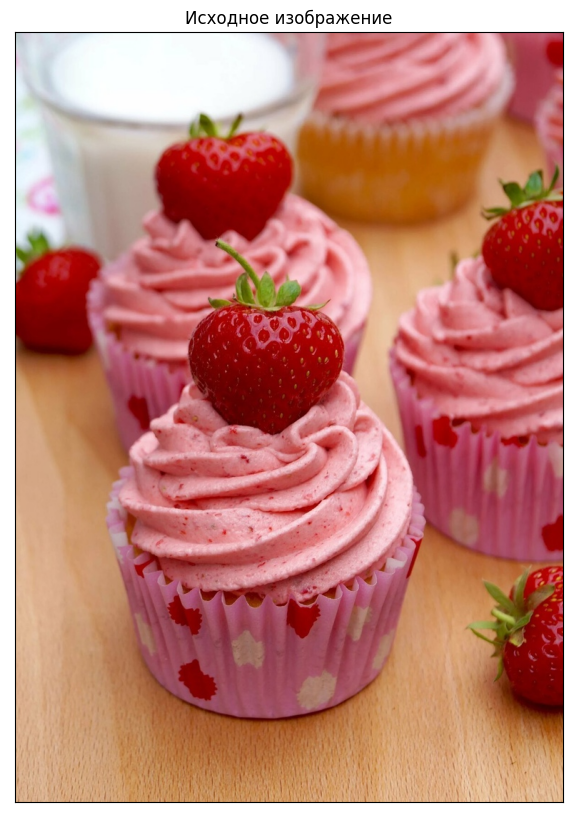

In [75]:
img_i = 0
gs = plt.GridSpec(1, 1)
plt.figure(figsize=(10, 10))

plt.subplot(gs[img_i])
plt.imshow(image_rgb)
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])
img_i += 1

plt.show()

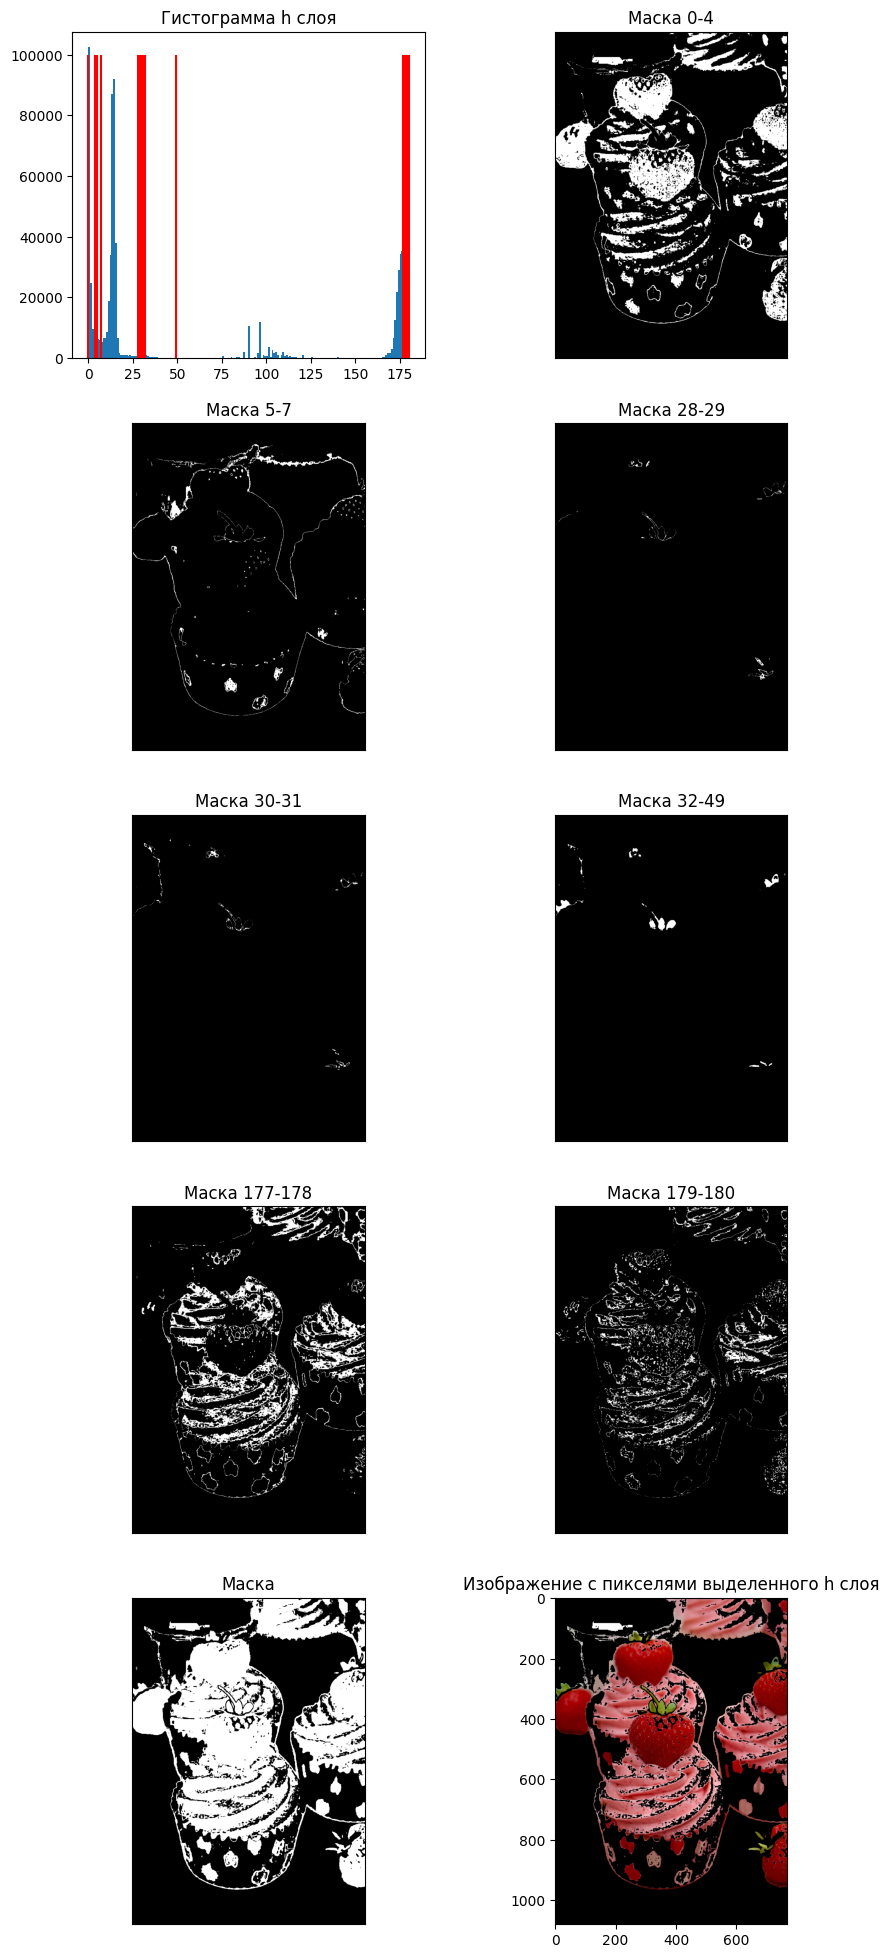

In [76]:
range_hs = [
            [0, 4],
            [5, 7],
            [28, 29],
            [30, 31],
            [32, 49],
            [177, 178],
            [179, 180],
            ]

masks_h = [cv.inRange(h, range_h[0], range_h[1]) for range_h in range_hs]
mask_h = cv.inRange(h, -1, -1)
for i in range(len(masks_h)):
    mask_h = mask_h | masks_h[i] 
result_h = cv.bitwise_and(image_rgb, image_rgb, mask=mask_h)


img_i = 0
gs = plt.GridSpec(10, 2)
plt.figure(figsize=(10, 50))

plt.subplot(gs[img_i])
plt.hist(h.reshape(-1), np.max(h), [np.min(h), np.max(h)])
for range_h in range_hs:
    plt.vlines(range_h[0], 0, 100000, 'r'), plt.vlines(range_h[1], 0, 100000, 'r')
plt.title('Гистограмма h слоя')
img_i += 1

for i in range(len(masks_h)):
    plt.subplot(gs[img_i])
    plt.imshow(masks_h[i], cmap='gray')
    plt.title(f'Маска {range_hs[i][0]}-{range_hs[i][1]}')
    plt.xticks([]), plt.yticks([])
    img_i += 1

plt.subplot(gs[img_i])
plt.imshow(mask_h, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
img_i += 1

plt.subplot(gs[img_i])
plt.imshow(result_h)
plt.title('Изображение с пикселями выделенного h слоя')
img_i += 1

plt.show()

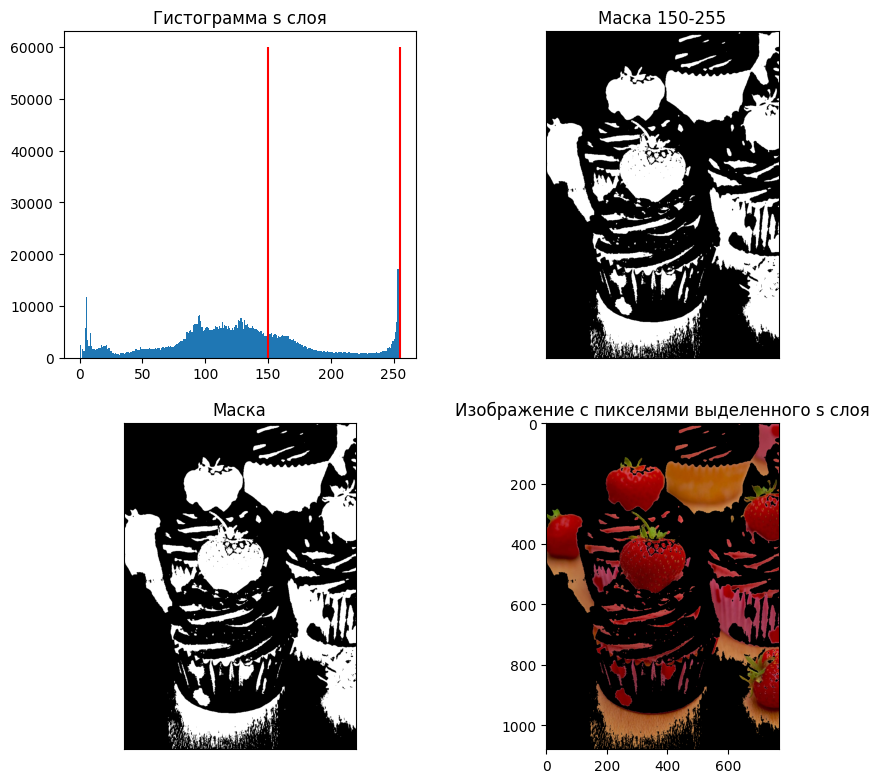

In [77]:
range_ss = [
            [150, 255],
            ]

masks_s = [cv.inRange(s, range_s[0], range_s[1]) for range_s in range_ss]
mask_s = cv.inRange(s, -1, -1)
for i in range(len(masks_s)):
    mask_s = mask_s | masks_s[i] 
result_s = cv.bitwise_and(image_rgb, image_rgb, mask=mask_s)


img_i = 0
gs = plt.GridSpec(10, 2)
plt.figure(figsize=(10, 50))

plt.subplot(gs[img_i])
plt.hist(s.reshape(-1), np.max(s), [np.min(s), np.max(s)])
for range_s in range_ss:
    plt.vlines(range_s[0], 0, 60000, 'r'), plt.vlines(range_s[1], 0, 60000, 'r')
plt.title('Гистограмма s слоя')
img_i += 1

for i in range(len(masks_s)):
    plt.subplot(gs[img_i])
    plt.imshow(masks_s[i], cmap='gray')
    plt.title(f'Маска {range_ss[i][0]}-{range_ss[i][1]}')
    plt.xticks([]), plt.yticks([])
    img_i += 1

plt.subplot(gs[img_i])
plt.imshow(mask_s, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
img_i += 1

plt.subplot(gs[img_i])
plt.imshow(result_s)
plt.title('Изображение с пикселями выделенного s слоя')
img_i += 1

plt.show()

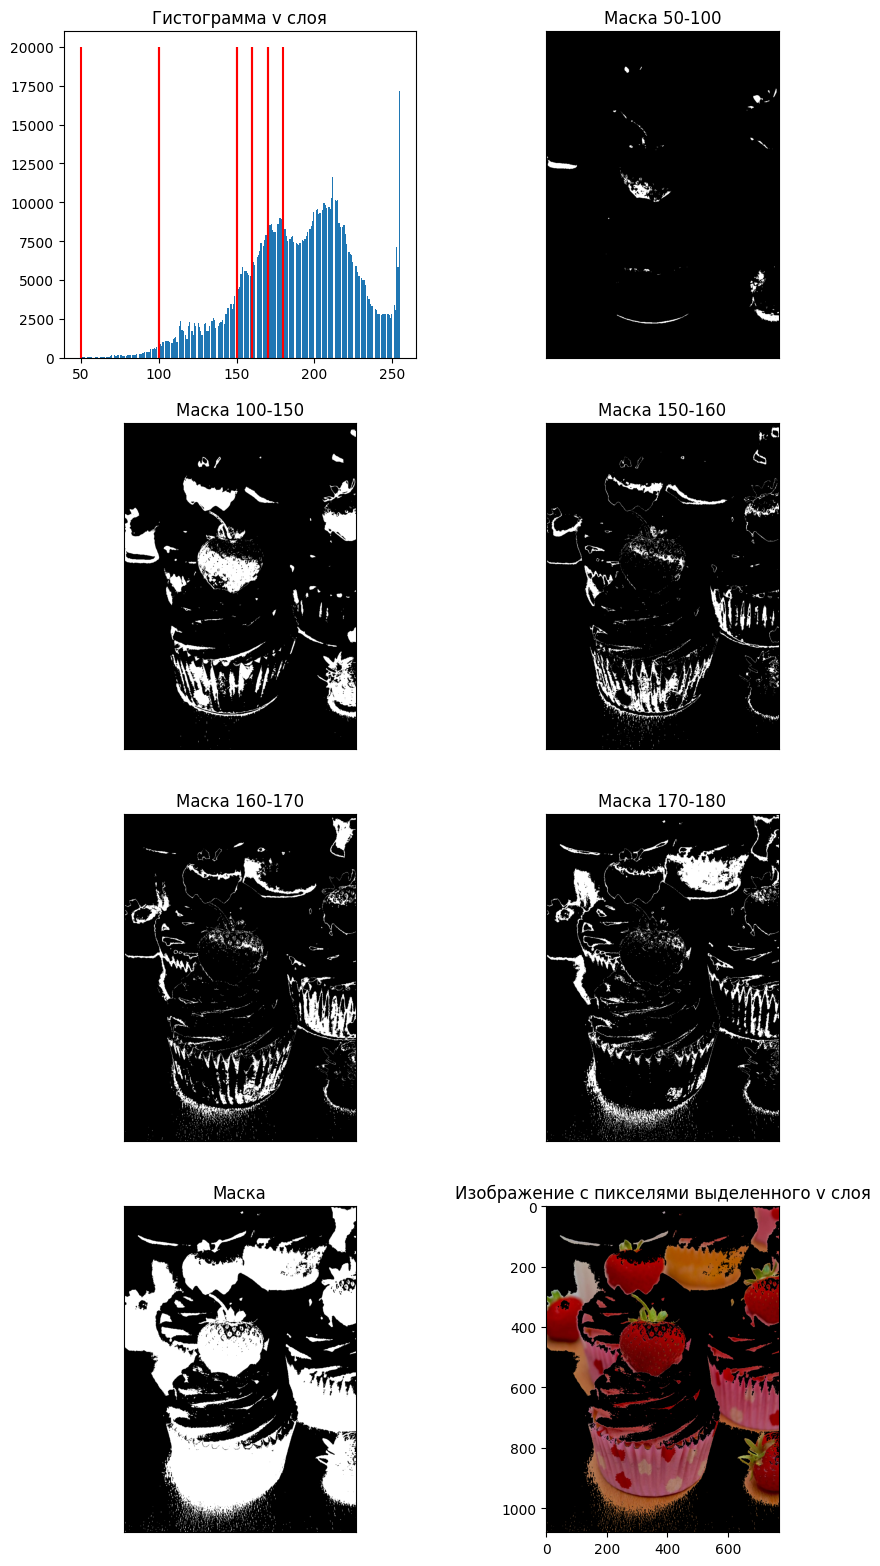

In [78]:
range_vs = [
            [50, 100],
            [100, 150],
            [150, 160],
            [160, 170],
            [170, 180],
            ]

masks_v = [cv.inRange(v, range_v[0], range_v[1]) for range_v in range_vs]
mask_v = cv.inRange(v, -1, -1)
for i in range(len(masks_v)):
    mask_v = mask_v | masks_v[i] 
result_v = cv.bitwise_and(image_rgb, image_rgb, mask=mask_v)


img_i = 0
gs = plt.GridSpec(10, 2)
plt.figure(figsize=(10, 50))

plt.subplot(gs[img_i])
plt.hist(v.reshape(-1), np.max(v), [np.min(v), np.max(v)])
for range_v in range_vs:
    plt.vlines(range_v[0], 0, 20000, 'r'), plt.vlines(range_v[1], 0, 20000, 'r')
plt.title('Гистограмма v слоя')
img_i += 1

for i in range(len(masks_v)):
    plt.subplot(gs[img_i])
    plt.imshow(masks_v[i], cmap='gray')
    plt.title(f'Маска {range_vs[i][0]}-{range_vs[i][1]}')
    plt.xticks([]), plt.yticks([])
    img_i += 1

plt.subplot(gs[img_i])
plt.imshow(mask_v, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
img_i += 1

plt.subplot(gs[img_i])
plt.imshow(result_v)
plt.title('Изображение с пикселями выделенного v слоя')
img_i += 1

plt.show()

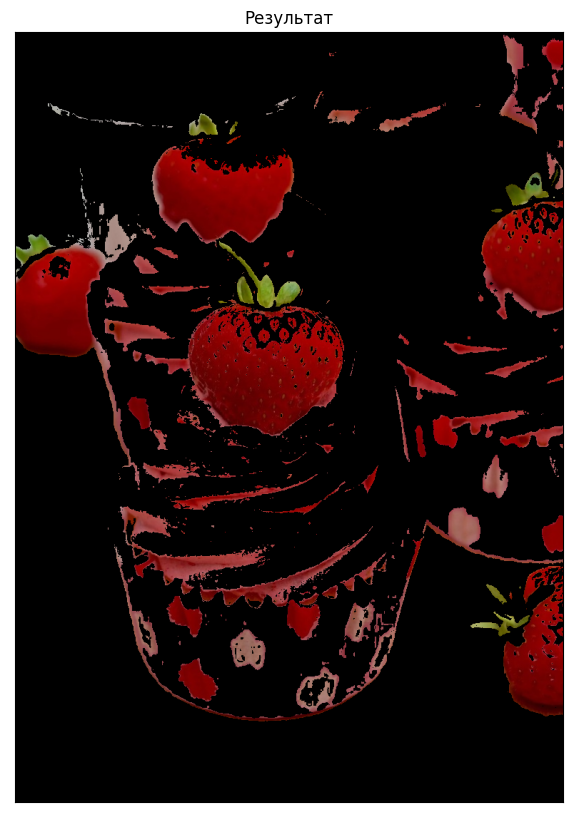

In [79]:
result = cv.bitwise_and(image_rgb, image_rgb, mask=mask_h & mask_h & mask_v)


img_i = 0
gs = plt.GridSpec(1, 1)
plt.figure(figsize=(10, 10))

plt.subplot(gs[img_i])
plt.imshow(result)
plt.title('Результат')
plt.xticks([]), plt.yticks([])
img_i += 1

plt.show()